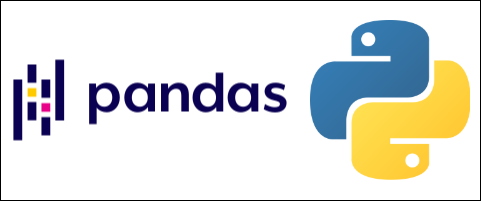

# Comprehensive Guide to Pandas  

Let's explore how to use one of the most important and widely used tool among the data scientists - **Pandas**.

The `Pandas` library makes creating, viewing and manipulating dataframes a lot easier.

In this notebook, let's see how to do the following in detail,

* Getting Data: How to get/read different kinds of datafiles.
* Creating Data: How to create pandas dataframes using pandas objects.
* Knowing your Data: How to check some basic info about the data.
* Manipulating Data: How to do basic operations on your dataframe and extract information.
* Cleaning the Data: How to handle raw data and perform required preprocessing for further use

Now let's get started...


## Installation

Before we continue, we need to import the pandas library. This can be done by following:

`import pandas as pd`

By default, the library will be installed in Google Colab.
If you want to install the pandas library locally, install it using the following:

`pip install pandas` (installing in terminal/command prompt) or

`!pip install pandas` (installing in jupyter notebook)


In [ ]:
# Import pandas
import pandas as pd

## Getting the Data



In this section, let's see different ways to read the data. We will use the `read_csv` method that has the following properties,
* Read different formats of data i.e. CSV, TSV, Text files etc easily using a single line of code.
* Can load files both locally and from an URL
* Convert the data into pandas dataframes that can be easily manipulated

Now let's see it in action,

### Reading files from local computer



For the illustration purpose, download the Housing Prices dataset from kaggle into local computer.

Link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv

Then upload the CSV files to colab.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Check the contents by using the os module
import os
os.listdir()

['.DS_Store', 'Pandas_Reference_Notebook.ipynb', '.ipynb_checkpoints']

Great we have the data. Now let's read it using pandas. `CSV` or `Comma separated values` are files that have the values that are separated by commas. You can just open the csv file and inspect it.

The `read_csv()` method  takes in the path of the file as argument and loads them and converts it into the `DataFrame` format.

In [ ]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Reading files from URL



Now let's load the dataframe directly from an URL that contains the CSV/TSV file. Also observe how we can load TSV or any kind of file by using the `read_csv()` method. By defining the `sep` or separator we can load the data from any formats.

In the below example, we are download a `TSV` or `Tab separated values` file by specifying `sep="\t"`.

In [ ]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipotle_df = pd.read_csv(url, sep="\t")

chipotle_df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


Great! Now since we have loaded the data, let's get some information about the data.

## Introduction to Pandas Objects

We have seen how to read already existing data from CSV files. But you might wonder what if we want to create our dataframes from numpy arrays or python list? Don't need to worry. We have some of the fundamental data structures of pandas library for our rescue. Those are `Series`, `DataFrame` and `Index`. Let's look each of these in detail.

### The Pandas Series Object

A Pandas `Series` is a one-dimensional array of indexed data. It can be created from a list or array as follows:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we can see, the series object wraps the sequence of values and a sequence of indeces. We can access these by using the `values` and `index` attributes respectively.

In [ ]:
# Access the values from data
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [ ]:
# Access the index
data.index

RangeIndex(start=0, stop=4, step=1)

From the above, we can conclude that the values are just numpy arrays whereas the index column consists of array-like object of type `pd.index`. Pandas will add the index as range of numbers starting from 0 to length of series object by default.

There are some other ways through which we can create pandas series objects. Some of them are as follows:

#### I: Series as generalised NumPy array

We can create `Series` object by specifying the values and index as numpy arrays.

In [ ]:
data1 = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data1

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

We can even use non-contiguous or non-sequential indices (Index sequence length should be equal to values array):

In [ ]:
data2 = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data2

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

The Index column is important because it is primarily used for accessing items. We will discuss more techniques of indexing in the next section.

In [ ]:
# Access using string key from data1
data1['d']

1.0

In [ ]:
# Access using the int key from data2
data2[3]

0.75

Great! Now let's check another form of creating and accessing `Series` data.

#### II: Series as specialized dictionary

The Series-as-dictionary analogy can be made even more clear by constructing a Series object directly from a Python dictionary:

In [ ]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

When we create pandas `series` object directly from python dictionary, the keys and values of the dictionary will be converted to the `index` and `values` of the Series object. Let's just check it out...


In [ ]:
# Check the values
population.values

array([38332521, 26448193, 19651127, 19552860, 12882135])

In [ ]:
# Check the index
population.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Now let's dive into the Pandas DataFrame object.

### The Pandas DataFrame Object

Like the `Series` object, the Pandas `DataFrame` object is a 2-dimensional array with flexibile row indeces and columns names. The `DataFrame` object can also be thought as multiple `Series` objects sequentially aligned by sharing the same indeces.

In [ ]:
# Create the population_df dataframe with population key
population_df = pd.DataFrame({'population': population})
population_df

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


We can create a pandas `DataFrame` using the `pd.DataFrame()` method. This method takes in a dictionary of series objects as argument. Let's add another column to the population dataframe.

In [ ]:
# Add area column to the population dataframe
area = [52312, 32123, 83432, 8291, 2313]
population_df = pd.DataFrame({'population': population, 'area': area})
population_df

,population,area
California,38332521,52312
Texas,26448193,32123
New York,19651127,83432
Florida,19552860,8291
Illinois,12882135,2313


In [ ]:
# We can do the above using the indeces
area = {'California': 52312, 'Texas': 32123, 'New York': 83432, 'Florida': 8291, 'Illinois': 2313}
population_df = pd.DataFrame({'population': population, 'area': area})
population_df

,population,area
California,38332521,52312
Texas,26448193,32123
New York,19651127,83432
Florida,19552860,8291
Illinois,12882135,2313


Great! We got the same results. Now let's check the values and indece of the dataframe.

In [ ]:
# Check the values of population_df
population_df.values

array([[38332521,    52312],
       [26448193,    32123],
       [19651127,    83432],
       [19552860,     8291],
       [12882135,     2313]])

In [ ]:
# Check the indeces of population_df
population_df.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

It is same as the `series` object. In DataFrame, the index column is the row index and the values are the column values. Hence let's check the columns that the dataframe contains.

In [ ]:
# Check the columns of population_df
population_df.columns

Index(['population', 'area'], dtype='object')

We can access separate columns from dataframe in the same way:

In [ ]:
# Access the population column
population_df.population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [ ]:
# Access the area column
population_df.area

California    52312
Texas         32123
New York      83432
Florida        8291
Illinois       2313
Name: area, dtype: int64

Note: We can flip the values and index of the `DataFrame` object by using the transpose method.

In [ ]:
population_df.T

,California,Texas,New York,Florida,Illinois
population,38332521,26448193,19651127,19552860,12882135
area,52312,32123,83432,8291,2313


Let's now create another dataframe from scratch and see how it looks like.

In [ ]:
# Create a new dataframe with columns 'a', 'b', 'c'.
# The values will be random integers between 0 and 100
import numpy as np
df = pd.DataFrame({'a': pd.Series(np.random.randint(0, 100, 1000)),
                   'b': pd.Series(np.random.randint(0, 100, 1000)),
                   'c': pd.Series(np.random.randint(0, 100, 1000))})
df

,a,b,c
0,0,24,94
1,29,3,75
2,82,72,43
3,71,91,63
4,78,9,25
...,...,...,...
995,21,22,0
996,48,99,67
997,46,11,29
998,78,84,82


Cool ! We have created the dataframe with 3 columns and 1000 rows. Now let's see how we can explore the dataframe.

## Exploring Data

Let's now explore the dataframe using various methods available in pandas.


### 1. Load the occupation data from URL

Load the data from the URL and create a dataframe.

In [ ]:
# Load the Occupation dataset from the URL. Paste the link in browser to view it.
occupation_df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep="|")
occupation_df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


### 2. View first 10 rows in the dataframe using `head()`

In [ ]:
# Display first 10 rows
occupation_df.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


### 3. View last 5 rows from the dataframe using `tail()`

In [ ]:
# Display last 5 rows
occupation_df.tail(5)

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


### 4. Check the shape and length of dataframe

Now let's check some basic information like shape, length,  number of columns and rows etc.

In [ ]:
# Print the shape and length of the dataset
print(f"Shape of dataframe is {occupation_df.shape}")
print(f"Number of rows in df: {occupation_df.shape[0]}")
print(f"Number of columns in df: {occupation_df.shape[1]}")
print(f"Length of df: {len(occupation_df)}")

Shape of dataframe is (943, 5)
Number of rows in df: 943
Number of columns in df: 5
Length of df: 943


### 5. Check the columns and its datatypes


In [ ]:
# Print the columns and the data types of the columns
print(f"Columns : {occupation_df.columns}")
print(f"Datatypes of each column: \n{occupation_df.dtypes}")

Columns : Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')
Datatypes of each column: 
user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object


### 6. Access individual columns or group of columns at a time

In [ ]:
# Select the 'occupation' column
occupation_df["occupation"]

0         technician
1              other
2             writer
3         technician
4              other
           ...      
938          student
939    administrator
940          student
941        librarian
942          student
Name: occupation, Length: 943, dtype: object

In [ ]:
# Select the 'age', 'gender' and 'occupation' columns
occupation_df[["age", "gender", "occupation"]]

,age,gender,occupation
0,24,M,technician
1,53,F,other
2,23,M,writer
3,24,M,technician
4,33,F,other
...,...,...,...
938,26,F,student
939,32,M,administrator
940,20,M,student
941,48,F,librarian


### 7. Use `describe()` to get the summary statistics of the dataframe

In [ ]:
# Explore the summary statistics using `describe()`
occupation_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


By default, the `describe()` method is applied to only numerical values.

### 8. Access data using indexing - `iloc` and `loc`

Pandas provides two methods for accessing data using indexing. The `iloc` method is used for integer-location based indexing and the `loc` method is used for label-location based indexing. Let's see in detail how each of the indexing technqiues works.

#### 1. `iloc` - Implicit Location-based Indexing

This method is used to index and slice dataframe using the implicit-Python style indexing.
Let's create a sample dataframe to illustrate the difference between `iloc` and `loc` indexing.

In [ ]:
# Create a sample dataframe with indeces ['a', 'b', 'c', 'd', 'e'] and two columns filled with random integers in the range of 0 to 100
sample_df = pd.DataFrame({'c1': [np.random.randint(0, 1000) for i in range(5)],
                            'c2': [np.random.randint(0, 100) for i in range(5)],
                            'c3': [np.random.randint(0, 100) for i in range(5)]},
                        index=['a', 'b', 'c', 'd', 'e'])
sample_df

,c1,c2,c3
a,778,40,95
b,283,91,97
c,641,99,88
d,798,8,69
e,865,11,50


In the above cell, we have created a dataframe with 3 columns and 5 rows. Let's see how we can access the data using `iloc` indexing. Before that let's just print the index and columns of the dataframe.

In [ ]:
# Print the index of the sample dataframe
sample_df.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [ ]:
# Access the samle dataframe using the iloc method - select first row
sample_df.iloc[0]

c1    778
c2     40
c3     95
Name: a, dtype: int64

In [ ]:
# Select the first 3 rows using iloc
sample_df.iloc[:3]

,c1,c2,c3
a,778,40,95
b,283,91,97
c,641,99,88


In [ ]:
# Select the middle 3 rows using iloc
sample_df.iloc[1:4]

,c1,c2,c3
b,283,91,97
c,641,99,88
d,798,8,69


In [ ]:
# Select the last 2 rows using iloc
sample_df.iloc[-2:]

,c1,c2,c3
d,798,8,69
e,865,11,50


In the above four different scenarios, we can observe that while indexing or selecting the dataframe using the `iloc` method, the indexing is done using the row index number i.e. an integer and not the index name. It is important to note:

**`iloc` indexing is 0-based. It follows the Python convention.**

Now let's explore various methods of `loc` indexing.

#### 2. `loc` - Explicit Location-based Indexing

This method is used to index and slice dataframe using the explicit indeces of the dataframe.
Let's use the dataset created above for the same purpose.


In [ ]:
# Display the sample dataframe
sample_df

,c1,c2,c3
a,778,40,95
b,283,91,97
c,641,99,88
d,798,8,69
e,865,11,50


In [ ]:
# Select the first row using loc
sample_df.loc[0]

KeyError: ignored

Oh ! We ran into `KeyError` error. It means that the key through which we are trying to access the data is not present in indeces i.e. ***0 is not present in the index row.*** Now let's check the correct way for using `loc` to access the data.

In [ ]:
# Select the first row using loc method
print(sample_df.index)
sample_df.loc['a']

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


c1    778
c2     40
c3     95
Name: a, dtype: int64

In [ ]:
# Select the first 3 rows using loc
sample_df.loc[:'c']

,c1,c2,c3
a,778,40,95
b,283,91,97
c,641,99,88


In [ ]:
# Select the middle 3 rows using loc
sample_df.loc['b':'d']

,c1,c2,c3
b,283,91,97
c,641,99,88
d,798,8,69


In [ ]:
# Select the last 2 rows using loc
sample_df.loc['e':]

,c1,c2,c3
e,865,11,50


From the above examples, we got some basic idea about the differences between `iloc` and `loc` indexing. In the `loc` indexing, the name of the index is used to index the dataframe rather than the position of the index. It is recomendded to use iloc indexing for accessing the dataframe due to its consistent and flexible nature.

## Manipulating Data

Lets now look at some basic manipulations that we can perform on the dataframe. This includes arithmetic operations, sorting, filtering, and more. We can also perform the same operations on the dataframe using the `apply()` method. Let's discuss some methods in detail.

In [ ]:
# Create two dataframe and fill it with random integers in the range of 0 to 100
sample_df1 = pd.DataFrame({'c1': [np.random.randint(0, 1000) for i in range(5)],
                            'c2': [np.random.randint(0, 100) for i in range(5)],
                            'c3': [np.random.randint(0, 100) for i in range(5)]})

sample_df2 = pd.DataFrame({'c1': [np.random.randint(0, 1000) for i in range(5)],
                            'c2': [np.random.randint(0, 100) for i in range(5)],
                            'c3': [np.random.randint(0, 100) for i in range(5)]})

In [ ]:
sample_df1

,c1,c2,c3
0,174,90,61
1,131,70,36
2,204,24,30
3,261,79,31
4,301,57,63


In [ ]:
sample_df2

,c1,c2,c3
0,655,59,80
1,222,15,73
2,725,52,49
3,492,28,62
4,888,68,3


### 1. Arithmetic Operations

Basic arithmetic operations can be performed on the dataframe. Let's see how we can perform addition, subtraction, multiplication and division on the dataframe.

In [ ]:
# Perform addition of two dataframes
sample_df1 + sample_df2

,c1,c2,c3
0,829,149,141
1,353,85,109
2,929,76,79
3,753,107,93
4,1189,125,66


Similary we can perform Subtraction, Multiplication and Division operations on the dataframe. The result of these operations will be a new dataframe. We can save it as a new dataframe or assign it to the original dataframe.

In [ ]:
# Perform arithmetic operation of of all columns and create new column
sample_df1["result"] = sample_df1["c1"] * sample_df1["c2"] - sample_df1["c3"]
sample_df1

,c1,c2,c3,result
0,174,90,61,15599
1,131,70,36,9134
2,204,24,30,4866
3,261,79,31,20588
4,301,57,63,17094


In [ ]:
# Divide the "result" column by the "c2" column
sample_df1["result"] / sample_df1["c2"]

0    173.322222
1    130.485714
2    202.750000
3    260.607595
4    299.894737
dtype: float64

The above code is applicable to all the arithmetic operations. Let's see how we can perform the same operations on the dataframe using the `apply()` method.

### 2. Using `apply()` method

Let's apply some arithmetic operations on the dataframe using the `apply()` method. We will use the lambda function to perform operation on the dataframe.

In [ ]:
# Perform floor division on the "result" column by 2
sample_df1["result"].apply(lambda x: x // 2)
sample_df1

,c1,c2,c3,result
0,174,90,61,15599
1,131,70,36,9134
2,204,24,30,4866
3,261,79,31,20588
4,301,57,63,17094


We can see observe that there is no change in the `result` column even though we have performed floor division operation. This is because by default pandas will return the result of the operation and we need to explicitly update the column. This can be done as follows:

In [ ]:
# Assigning the result back to the "result" column
sample_df1["result"] = sample_df1["result"].apply(lambda x: x // 2)
sample_df1

,c1,c2,c3,result
0,174,90,61,7799
1,131,70,36,4567
2,204,24,30,2433
3,261,79,31,10294
4,301,57,63,8547


### 3. Sorting & Filtering based on conditions

We can perform basic sorting and filtering operations on the dataframe using some boolean expressions. To illustrate, let's use the `occupation_df` dataframe.

In [ ]:
# Load the Occupation dataset from the URL. Paste the link in browser to view it.
occupation_df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep="|")
occupation_df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Now let's apply some `sort` operations on some rows of the dataframe.

Note: By default, the pandas won't apply the changes to the original dataframe. We need to explicitly update the dataframe. We can use the `inplace` argument to do so.

#### 1. Sort the dataframe - I

Sort the dataframe based on the `age` column. We can sort the dataframe based on the `age` column using the `sort_values()` method. By specifying the `ascending` parameter, we can sort the dataframe in ascending order.

In [ ]:
# Sort the occupation_df by age in ascending order
occupation_df.sort_values(by="age", ascending=True)

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
...,...,...,...,...,...
584,585,69,M,librarian,98501
766,767,70,M,engineer,00000
802,803,70,M,administrator,78212
859,860,70,F,retired,48322


In [ ]:
# Sort the occupation_df by age in descending order
occupation_df.sort_values(by="age", ascending=False)

,user_id,age,gender,occupation,zip_code
480,481,73,M,retired,37771
802,803,70,M,administrator,78212
766,767,70,M,engineer,00000
859,860,70,F,retired,48322
584,585,69,M,librarian,98501
...,...,...,...,...,...
879,880,13,M,student,83702
608,609,13,F,student,55106
288,289,11,M,none,94619
470,471,10,M,student,77459


#### 2. Sort the dataframe - II

In the below result, we can see that the `occupation` column is sorted in ascending order. To the change permanent, let's use the `inplace` parameter.

In [ ]:
# Sort the dataframe based on the `age` column with inplace=True
occupation_df.sort_values(by="occupation", inplace=True)
occupation_df

,user_id,age,gender,occupation,zip_code
71,72,48,F,administrator,73034
767,768,29,M,administrator,12866
325,326,41,M,administrator,15235
856,857,35,F,administrator,V1G4L
88,89,43,F,administrator,68106
...,...,...,...,...,...
263,264,36,F,writer,90064
490,491,43,F,writer,53711
497,498,26,M,writer,55408
389,390,42,F,writer,85016


#### 3. Sort the dataframe - III

Sort the dataframe based on both `age` and `gender` columns with `inplace=True`. Let's sort the dataframe based on both `age` and `gender` columns.

In [ ]:
# Sort the dataframe based on the `age` and  'gender' column with inplace=False
occupation_df.sort_values(by=["age", "gender"], ascending=True, inplace=False)

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
608,609,13,F,student,55106
673,674,13,F,student,55337
...,...,...,...,...,...
584,585,69,M,librarian,98501
859,860,70,F,retired,48322
802,803,70,M,administrator,78212
766,767,70,M,engineer,00000


If we observe the result, the entire dataframe has been sorted according to ascending order depending on the `age` and `gender` columns.

#### 4. Filter the Dataframe - I

Select separate male and female students list. We can filter the dataframes by using the subscript method and matching the required conditions.

In [ ]:
# Select rows that has only gender=F and occupation=student
female_students = occupation_df[(occupation_df["gender"] == 'F') & (occupation_df["occupation"] == 'student')]
female_students.head()

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
786,787,18,F,student,98620
886,887,14,F,student,27249
812,813,14,F,student,02136
848,849,15,F,student,25652


In [ ]:
# Select rows that has only gender=< and occupation=student
male_students = occupation_df[(occupation_df["gender"] == 'M') & (occupation_df["occupation"] == 'student')]
male_students.head()

,user_id,age,gender,occupation,zip_code
724,725,21,M,student,91711
940,941,20,M,student,97229
728,729,19,M,student,56567
726,727,25,M,student,78741
868,869,30,M,student,10025


In the above example, we have used `&` to select rows that satisfy both the conditions. Now let's see how we can filter the dataframe if only one condition is met.

#### 5. Filter the Dataframe - II

Select students with age between 18 and 22 or engineer with age between 25 to 30.

In [ ]:
# Filter the dataframes using the `or` condition
occupation_df[ (((occupation_df["age"] > 18) & (occupation_df["age"] < 22)) &  (occupation_df["occupation"] == 'student')) |
               (((occupation_df["age"] >= 25) & (occupation_df["age"] < 30)) & (occupation_df["occupation"] == 'engineer')) ]

,user_id,age,gender,occupation,zip_code
246,247,28,M,engineer,20770
539,540,28,M,engineer,91201
915,916,27,M,engineer,N2L5N
69,70,27,M,engineer,60067
745,746,25,M,engineer,19047
...,...,...,...,...,...
533,534,20,M,student,05464
67,68,19,M,student,22904
75,76,20,M,student,02215
541,542,21,M,student,60515


#### 6. Shuffle/Sample the Dataframe

Let's sample the dataframe i.e. randomly select some samples from the dataset. We can use the `sample()` method to do this. This can also be used to shuffle the dataframe.

In [ ]:
# Select 100 samples randomly from the dataframe
occupation_df.sample(n=100, random_state=100)

,user_id,age,gender,occupation,zip_code
485,486,39,M,educator,93101
915,916,27,M,engineer,N2L5N
803,804,39,M,educator,61820
170,171,48,F,educator,78750
917,918,40,M,scientist,70116
...,...,...,...,...,...
902,903,28,M,educator,20850
149,150,20,F,artist,02139
334,335,45,M,executive,33775
823,824,31,M,other,15017


In [ ]:
# Shuffle the entire dataframe using frac=1
occupation_df.sample(frac=1, random_state=100)

,user_id,age,gender,occupation,zip_code
485,486,39,M,educator,93101
915,916,27,M,engineer,N2L5N
803,804,39,M,educator,61820
170,171,48,F,educator,78750
917,918,40,M,scientist,70116
...,...,...,...,...,...
540,541,19,F,student,84302
3,4,24,M,technician,43537
585,586,20,M,student,79508
229,230,28,F,student,14476


In [ ]:
# Select 50% of the samples randomly from the dataframe and reset the index to start from 0
occupation_df.sample(frac=0.5, random_state=100).reset_index(drop=True)

,user_id,age,gender,occupation,zip_code
0,486,39,M,educator,93101
1,916,27,M,engineer,N2L5N
2,804,39,M,educator,61820
3,171,48,F,educator,78750
4,918,40,M,scientist,70116
...,...,...,...,...,...
467,54,22,M,executive,66315
468,27,40,F,librarian,30030
469,764,27,F,educator,62903
470,840,39,M,artist,55406


Now we have some basic idea about how to manipulate and select data in the dataframe. Now let's check how to clean the dataframe.

## Cleaning Data

Cleaning data includes handling null values and missing values. Let's see how we can handle null values in the dataframe. For this section, we will us the chipotle_df dataframe.

In [ ]:
# Get the chiptotle_df dataframe
chiptotle_df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep="\t")
chiptotle_df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


We can clean the dataframe in the following steps:

### 1. Check for null values

We should check for null values in the dataframe before doing any manipulations. This is becasue we can't perform any manipulations on the dataframe if there are null values and it causes errors.

In [ ]:
# Find the total number of null values
chiptotle_df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

From the above example, we can see that there are 1246 null values in the `choice_description` column. Let's check the dataframe using the `isnull()` method.

In [ ]:
# Display the rows with null values
chiptotle_df[chiptotle_df.isnull().any(axis=1)]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
6,3,1,Side of Chips,NaN,$1.69
10,5,1,Chips and Guacamole,NaN,$4.45
14,7,1,Chips and Guacamole,NaN,$4.45
...,...,...,...,...,...
4600,1827,1,Chips and Guacamole,NaN,$4.45
4605,1828,1,Chips and Guacamole,NaN,$4.45
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50


### 2. Drop the rows with null values

Since we have `NaN` values in the `choice_description` column, we can't perform any manipulations on the dataframe. Let's see how we can handle the null values. We can do the following:
* Drop the rows with null values.
* Replace the null values with a string.

Since the column `choice_description` is a string, we can drop all the rows with null values.

In [ ]:
# Drop the null values in the chipotle_df
chiptotle_df.dropna()

,order_id,quantity,item_name,choice_description,item_price
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


From the above code, we can drop the rows with null values using the `dropna()` method. But if we want to explicitly apply the `dropna()` to specific column, we can specify it in the subset.

In [ ]:
# Drop the null values present in the choice_description column
chiptotle_df.dropna(subset=["choice_description"], inplace=True)
chiptotle_df

,order_id,quantity,item_name,choice_description,item_price
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


We can see that the length of the dataframe has reduced i.e. from 4622 to 3376. Because we have dropped the entire row even if there is only one null value.

### 3. Replace the null values with a string

But what if we don't want to drop the dataframe with null values? We can use the `fillna()` method. When we use the `fillna()` method, we can specify the value to be filled in null values.

In [ ]:
# Get the chipotle_df dataframe
chiptotle_df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep="\t")
chiptotle_df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
# Print the number of null values and total number of rows
print(f"Total number of rows: {chiptotle_df.shape[0]}")
print(f"Number of null values in dataframe: {chiptotle_df.isnull().sum().sum()}")

Total number of rows: 4622
Number of null values in dataframe: 1246


To illustrate for this example, let's replace the null values with the string `'No description'`.

In [ ]:
# Replace the null values with a string
chiptotle_df.choice_description.fillna("No description", inplace=True)

In [ ]:
# Print the number of null values and total number of rows
print(f"Total number of rows: {chiptotle_df.shape[0]}")
print(f"Number of null values in dataframe: {chiptotle_df.isnull().sum().sum()}")

Total number of rows: 4622
Number of null values in dataframe: 0


Great ! Now we have 0 `NaN` values in the dataframe and the total size is still 4622.

## Advanced Data Manipulation

In this final section, let's explore some advanced manipulation techniques like `merging` and `grouping` dataframes. We will also look at chaining techniques to apply multiple operations/methods at once to dataframes.

### Merging Dataframes